<a href="https://colab.research.google.com/github/pernilletemmerud/DCF-PT/blob/main/CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2 - Pernille Temmerud


## Subtask 1

Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]

In [43]:
#Importing packages 

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!pip install pillow_heif 

     |████████████████████████████████| 13.1 MB 5.4 MB/s 


In [5]:
from PIL import Image
import pillow_heif

In [12]:
#Convert the image to png - code from Notebook 11

image_folder = '/content/drive/MyDrive/DataScienceFundamentals/images/'

for filename in os.listdir(image_folder):
  url_name = filename
  heif_file = pillow_heif.read_heif(image_folder+url_name)
  image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)
  url_name = url_name.split('.')[0]+'.png'
  image.save(image_folder+url_name, format="png")

Exception ignored in: <function LibHeifCtx.__del__ at 0x7f1e234a8440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pillow_heif/_libheif_ctx.py", line 25, in __del__
    if self._fp_close_after and self.fp and hasattr(self.fp, "close"):
AttributeError: 'LibHeifCtx' object has no attribute 'fp'


## Subtask 2

With some filtering and thresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]

Image shape: ((4032, 3024, 3), (4032, 3024))


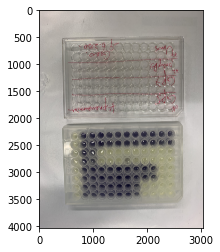

<Figure size 720x720 with 0 Axes>

Image shape: (2016, 3024)


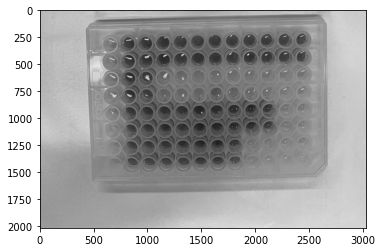

In [36]:
#loading one of the images and showing the B channel
url_name = 'IMG_5390.png'
imageRGB  = io.imread(image_folder+url_name)
plt.imshow(imageRGB)
image = imageRGB[:,:,2]
print(f'Image shape: {imageRGB.shape,image.shape}')

#plotting image
plt.figure(figsize=(10,10))
plt.show()

#cropping so I only see the lower part, changing color to gray
image = image[image.shape[0]//2:image.shape[0],:]
print(f'Image shape: {image.shape}')
plt.imshow(image, cmap ='gray')
plt.show()

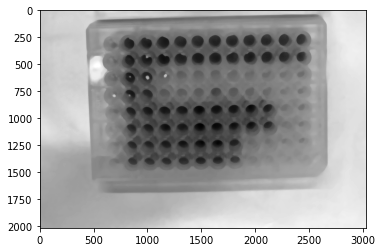

In [37]:
#removing white reflection with filtering

image_mean = skf.median(image,selem=skm.disk(20))
plt.imshow(image_mean, cmap ='gray')
plt.show()

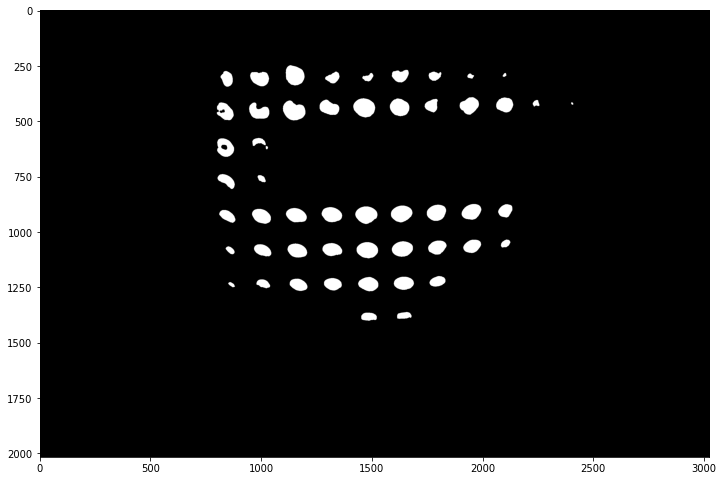

In [38]:
threshold_manual = 60

#create a mask using a logical operation
image_threshold = image_mean<threshold_manual

plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

As we can see on the image above, a few of the colored bins are missing after thresholding. Trying so solve this by changig the threshold value. After some try and fail, I found that at threshold of 72 you can see all the bins without any noise. 

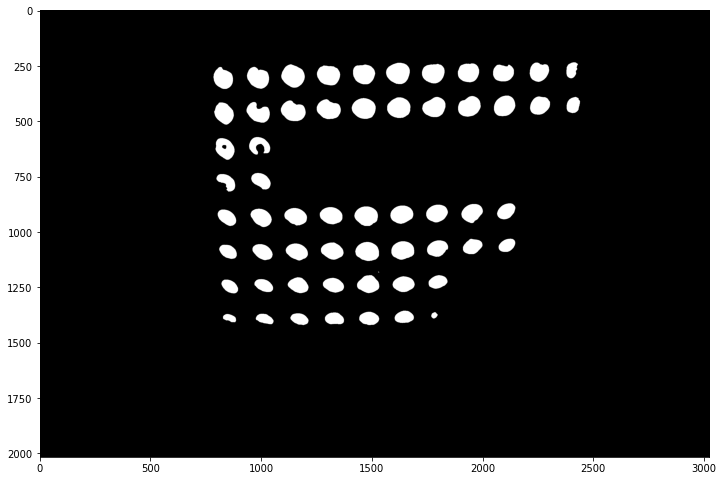

In [42]:
threshold_manual = 72

image_threshold = image_mean<threshold_manual

plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

## Subtask 3

Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points]

In [89]:
#Counting the number of bins - code from TowsifAhamed
#https://github.com/TowsifAhamed/white-and-black-dot-count-by-image-processing/blob/master/white%20dot%20count.py 


#threshold, using threshold value = 72
th, threshed = cv2.threshold(image, 72, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#finding contours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

#filter by area. Found that the best count was found using s1=40 and s2=51
s1= 40
s2 = 51
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("\nNumber of bins: {}".format(len(xcnts)))


Number of bins: 57


The correct count is 58 bins, while the function only finds 57 bins. I tried to change threshold value and s1/s2, but could not find a way to get the correct count. 

## Subtask 4

Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

In [95]:
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):
      url_name = filename
      imageRGB  = io.imread(image_folder+url_name)
      image = imageRGB[:,:,2]
      image = image[image.shape[0]//2:image.shape[0],:]
      #plt.imshow(image, cmap ='gray')
      #plt.show()

      #threshold, using threshold value = 72
      th, threshed = cv2.threshold(image, 72, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

      #finding contours
      cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

      #filter by area. Found that the best count was found using s1=40 and s2=51
      s1= 40
      s2 = 51
      xcnts = []
      for cnt in cnts:    
          if s1<cv2.contourArea(cnt) <s2:
              xcnts.append(cnt)

      print(f'Number of bins in image {url_name}: {len(xcnts)}')

Number of bins in image IMG_5380.png: 111
Number of bins in image IMG_5379.png: 136
Number of bins in image IMG_5387.png: 136
Number of bins in image IMG_5386.png: 73
Number of bins in image IMG_5385.png: 98
Number of bins in image IMG_5384.png: 44
Number of bins in image IMG_5383.png: 50
Number of bins in image IMG_5382.png: 88
Number of bins in image IMG_5381.png: 96
Number of bins in image IMG_5393.png: 45
Number of bins in image IMG_5392.png: 73
Number of bins in image IMG_5391.png: 73
Number of bins in image IMG_5390.png: 57
Number of bins in image IMG_5389.png: 53
Number of bins in image IMG_5388.png: 57
